# Dynamical System

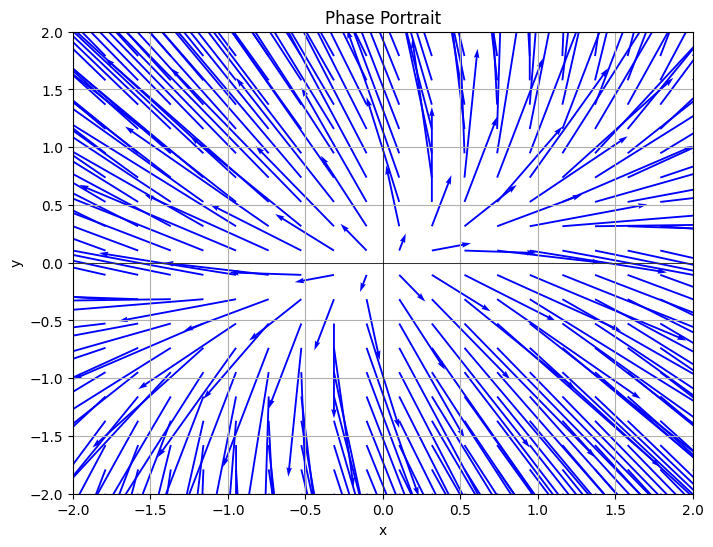

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the system functions
def phi(x, y):
    return 0.5*x + -0.3*y

def psi(x, y):
    return -0.2*x + 0.9*y

# Create a grid of x and y values
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# Calculate the derivatives using the system functions
X_dot = phi(X, Y)
Y_dot = psi(X, Y)

# Create a quiver plot
plt.figure(figsize=(8, 6))
plt.quiver(X, Y, X_dot, Y_dot, angles='xy', scale_units='xy', scale=0.5, color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phase Portrait')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.show()


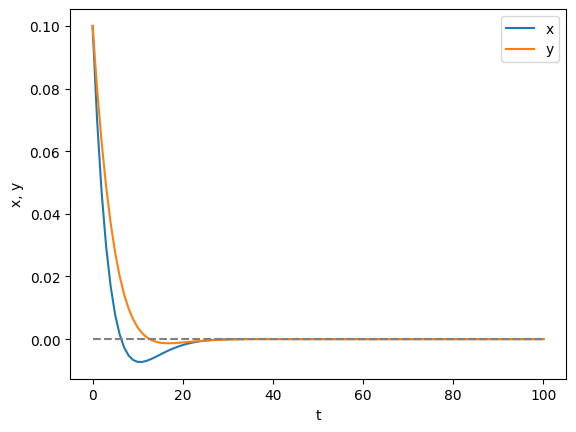

In [3]:
# illustrate the dynamics of the system and print the results

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import fsolve

# parameters
a = 0.9
b = -0.2
c = 0.1
d = 0.7

# Define the system functions
def phi(x, y):
    return a*x + b*y

def psi(x, y):
    return c*x + d*y

x = [0.1]
y = [0.1]
t = [0]

for i in range(100):
    t.append(t[i] + 1)
    x.append(phi(x[i], y[i]))
    y.append(psi(x[i], y[i]))

# plot
plt.plot(t, x, label='x')
plt.plot(t, y, label='y')
plt.xlabel('t')
plt.ylabel('x, y')
plt.hlines(0, 0, 100, colors='grey', linestyles='dashed')
plt.legend()

# save fig as pdf
plt.savefig('lin_sys.pdf', bbox_inches='tight', dpi=300)

# Cobweb Model

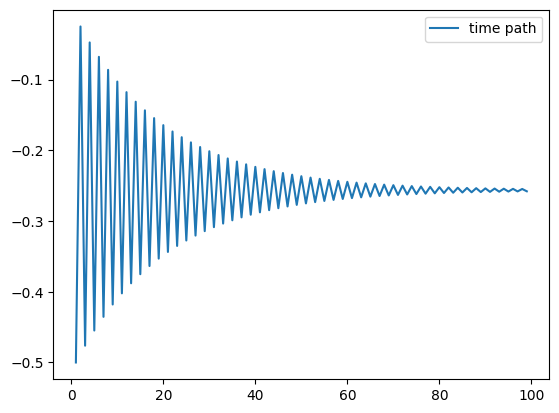

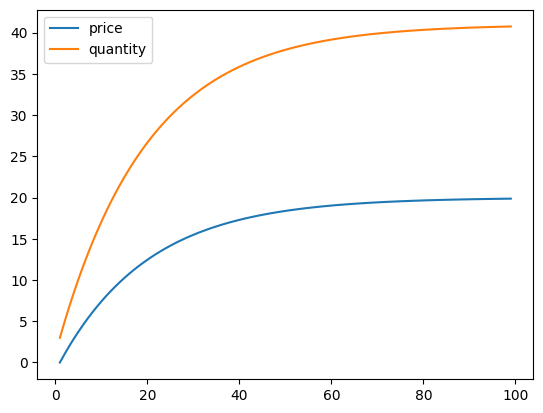

In [59]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

'''
given variables
a0: intercept of the demand curve(+ve) #gamma
b0: slope of the demand curve(-ve) #delta
a1: intercept of the supply curve(-ve) # N*alpha/(2*beta)) 
b1: slope of the supply curve(+ve) # N/(2*beta)
t: period
x0: period0 price

generated variables
x1: period1 price
pp: intertemporal eqm price
time_path: time path
dd: eqm demand
ss: eqm supply
in eqm condition dd and ss should and would be the same
'''

x0= sym.symbols('x0')
a0= sym.symbols('a0')
a1= sym.symbols('a1')
b0= sym.symbols('b0')
b1= sym.symbols('b1')
p0= sym.symbols('p0')
q0= sym.symbols('q0')
t= sym.symbols('t')

x1= (a1- a0)- (b1/b0)*x0
dd= a0+ b0*x1
ss= a1 + b1*x0
pp= -((a0-a1)/(b0-b1))
time_path_fn= ((p0- pp)*(b0/b1)**-t)+ pp
qq = a0 - b0 * x1

time_path=[]
solve= []
t1= list(range(1, 100))
x= 0
bi_pasa0= []
bi_qasa0= []
bi_pasa1= []
d=[]
s=[]

val_set1 = [1, -2, 2, 1.9, 0]
val_set2 = [2, -2, 5, 1.5, 4]

for i in t1:
  values= [1, -2, 2, 1.9, 0]
  x_1= x1.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  op= time_path_fn.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3]), (p0, values[4]), (t, i)])
  time_path.append(op)
  d.append(dd.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  s.append(ss.subs([(x0, x), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])]))
  q= qq.subs([(x1, x_1), (a0, values[0]), (b0, values[1]), (a1, values[2]), (b1, values[3])])
  bi_pasa0.append(x)
  bi_pasa1.append(x_1)
  bi_qasa0.append(q)
  x= x_1
plt.plot(t1, time_path, label= 'time path')
plt.legend()
plt.show()
plt.plot(t1, bi_pasa0, label= 'price')
plt.plot(t1, bi_qasa0, label= 'quantity')
plt.legend()
plt.show()
# plot of demand and supply